In [1]:
!pip install -q umap-learn
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
from umap import UMAP
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 696.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [5]:
data = load_iris(as_frame=True)['data']
target=load_iris()['target']
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

<Axes: >

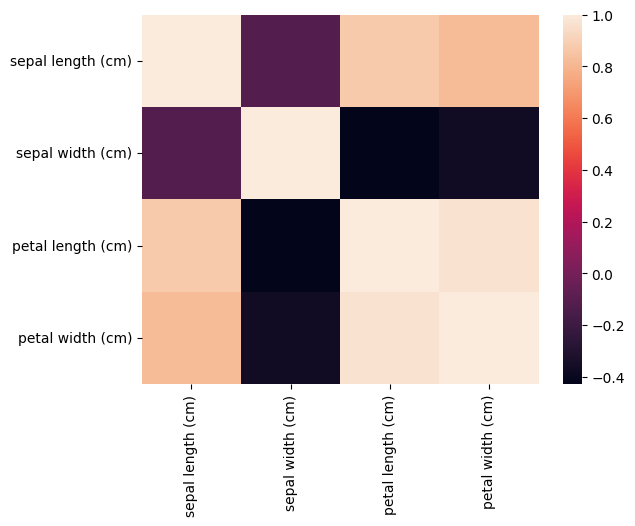

In [6]:
sns.heatmap(data.corr())

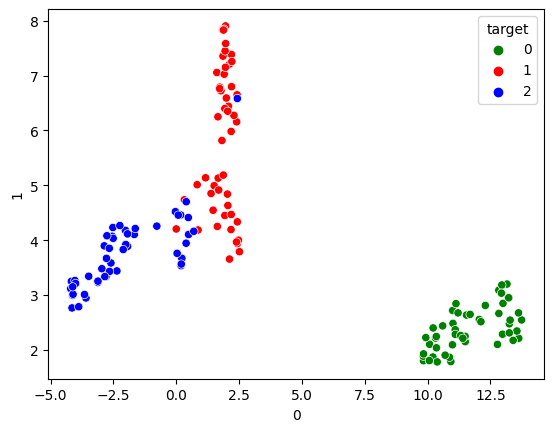

In [26]:
umap=UMAP(random_state=1000, n_components=2)
comps=umap.fit_transform(data)
sns.scatterplot(data=pd.DataFrame(comps).assign(target=target) ,x=0,y=1,hue='target',palette=['green','red','blue']);

Text(0.5, 1.0, 'Without UMAP')

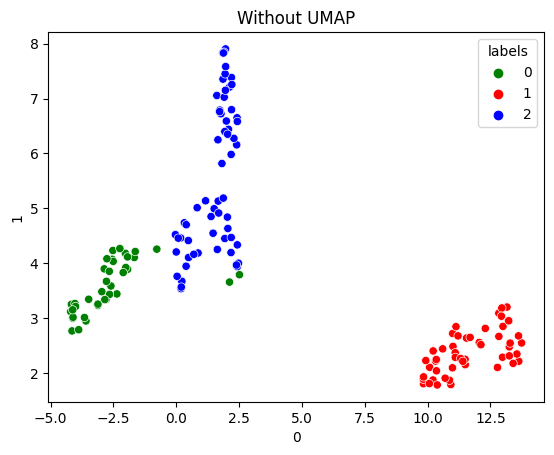

In [30]:
labels=kmeans.fit_predict(data)
sns.scatterplot(data=pd.DataFrame(comps).assign(labels=labels) ,x=0,y=1,hue='labels',palette=['green','red','blue']).set_title(label='Without UMAP')

<Axes: title={'center': 'With UMAP'}, xlabel='0', ylabel='1'>

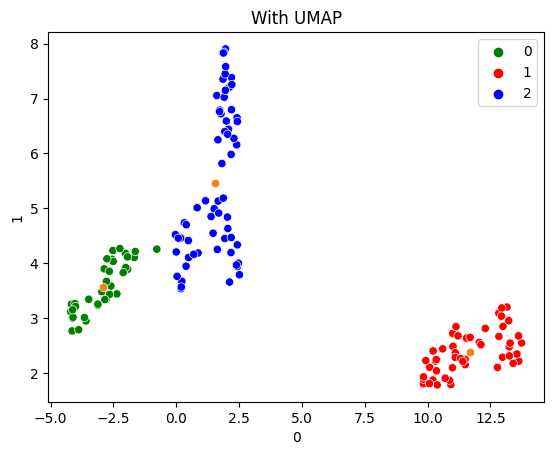

In [31]:
kmeans=KMeans(n_clusters=3, n_init=3)
labels=kmeans.fit_predict(comps)
sns.scatterplot(data=pd.DataFrame(comps).assign(labels=labels) ,x=0,y=1,hue='labels',palette=['green','red','blue']).set_title(label='With UMAP')
sns.scatterplot(data=pd.DataFrame(kmeans.cluster_centers_),x=0,y=1)

In [32]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1
0,-2.917063,3.571306
1,11.705907,2.388671
2,1.542778,5.465611


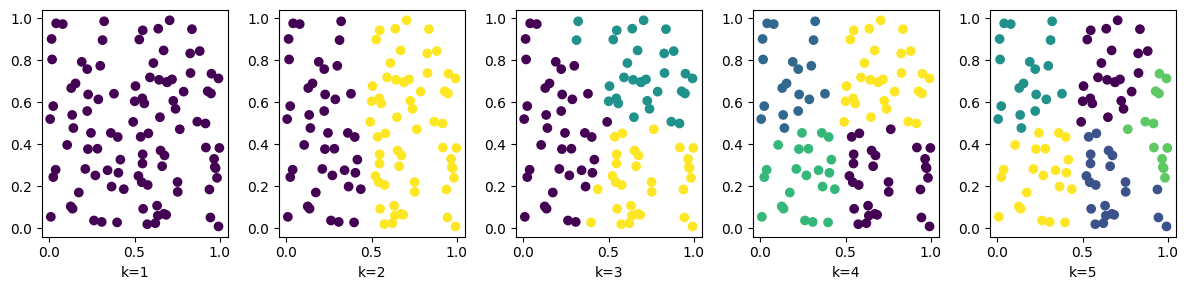

In [35]:
reference = np.random.rand(100, 2)
plt.figure(figsize=(12, 3))
for k in range(1,6):
  model = KMeans(n_clusters=k,n_init=3)
  a = model. fit_predict(reference)
  plt.subplot(1,5,k)
  plt.scatter(reference[:, 0], reference[:, 1], c=a)
  plt.xlabel ('k='+str(k))
plt.tight_layout()
plt.show()

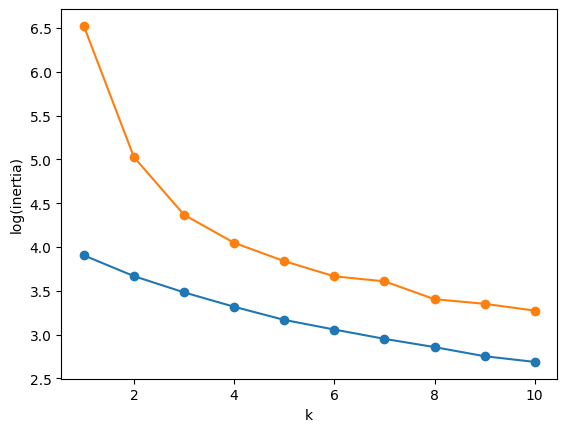

In [38]:

def compute_gap(data, k_max=10, n_references=5):
  if len(data.shape) == 1:
    data = data.reshape(-1, 1)
  reference = np.random.rand(*data.shape)
  reference_inertia = []
  for k in range(1, k_max+1):
    local_inertia = []
    for _ in range(n_references):
      clustering=KMeans(n_clusters=k,n_init=3)
      clustering.fit(reference)
      local_inertia.append(clustering.inertia_)
    reference_inertia.append(np.mean(local_inertia))
  ondata_inertia = []
  for k in range(1, k_max+1):
    clustering=KMeans(n_clusters=k,n_init=3)
    clustering.fit(data)
    ondata_inertia.append(clustering.inertia_)
  gap = np.log(reference_inertia)-np.log(ondata_inertia)
  return gap, np.log(reference_inertia), np.log(ondata_inertia)
k_max = 10
gap, reference_inertia, ondata_inertia = compute_gap(data, k_max)
plt.plot(range(1, k_max+1), reference_inertia, '-o', label='reference')
plt.plot(range(1, k_max+1), ondata_inertia, '-o', label='data')
plt.xlabel('k')
plt.ylabel('log(inertia)')
plt.show()

### Lab

In [2]:
n_samples = [150, 250, 100, 200, 300]
n_features=10
cluster_std=30
centers=[[50, 100], [300, 300], [150, 150], [400, 50], [50, 400]]
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples = [150, 250, 100, 200, 300], n_features=10, cluster_std=30, centers=[[50, 100], [300, 300], [150, 150], [400, 50], [50, 400]])

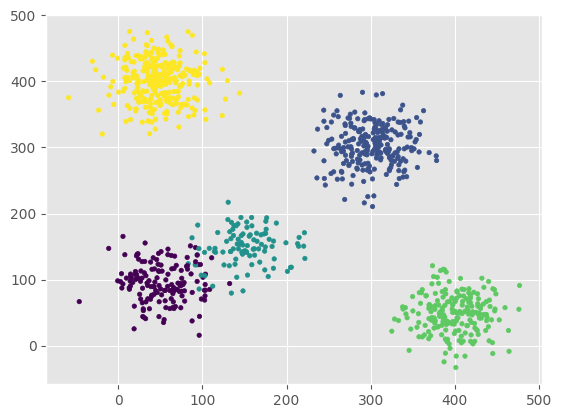

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.scatter(x[:,0], x[:,1], marker="o", c=np.squeeze(y), s=10)

<function matplotlib.pyplot.show(close=None, block=None)>

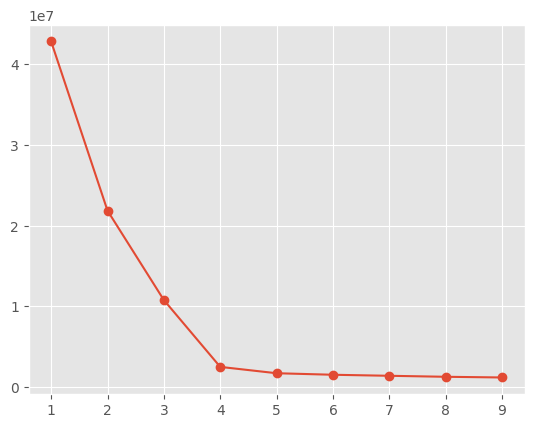

In [4]:
from sklearn.cluster import KMeans
ks=range(1, 10)
ssr=[]
for k in ks:
  model=KMeans(n_clusters=k, n_init=3)
  model.fit(x)
  ssr.append(model.inertia_)

plt.plot(ks, ssr, '-o')
plt.xticks(ks)
plt.show

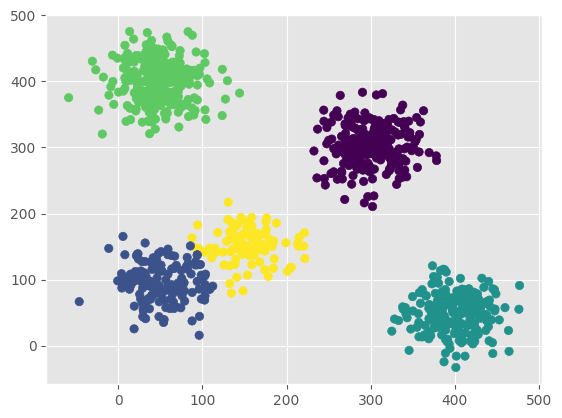

In [5]:
kmeans=KMeans(n_clusters=5, n_init=3)
pred=kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=pred)
plt.show()

In [6]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

--2023-08-15 11:18:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default of credit card clients.xls’

default of credit c     [  <=>               ]   5.28M  13.4MB/s    in 0.4s    

2023-08-15 11:18:48 (13.4 MB/s) - ‘default of credit card clients.xls’ saved [5539328]



In [7]:
df=pd.read_excel('/content/default of credit card clients.xls', header=1)
x=df.iloc[:,1:-1]
y=df.iloc[:,-1].values

In [8]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [9]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [10]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [26]:
umap=UMAP(random_state=1000)
comps=umap.fit_transform(x)

<Axes: xlabel='0', ylabel='1'>

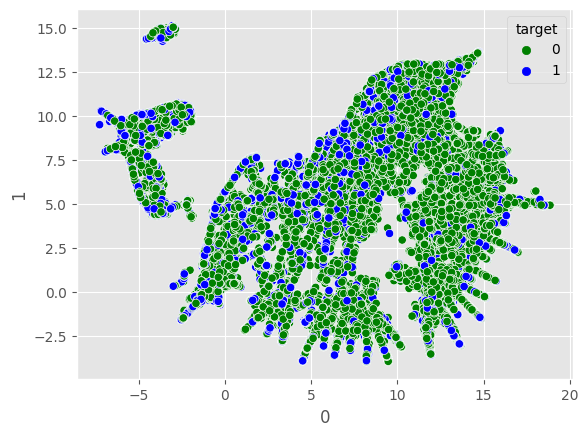

In [27]:
sns.scatterplot(data=pd.DataFrame(comps).assign(target=y), x=0, y=1, hue='target', palette=['green', 'blue' ])

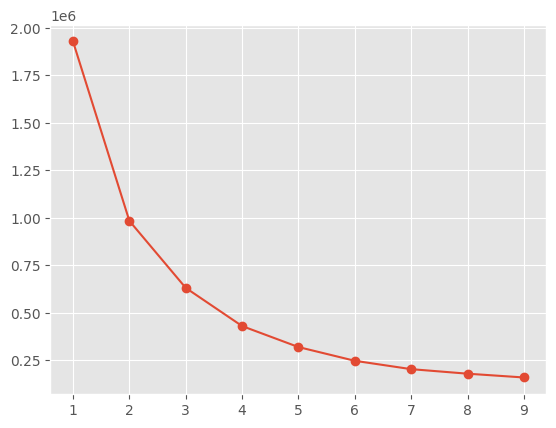

In [28]:
ssr=[]
for k in range(1, 10):
  model=KMeans(n_clusters=k, n_init=3)
  model.fit(comps)
  ssr.append(model.inertia_)

plt.plot(range(1, 10), ssr, '-o')
plt.xticks(range(1, 10))
plt.show()

Text(0.5, 1.0, '3 clusters')

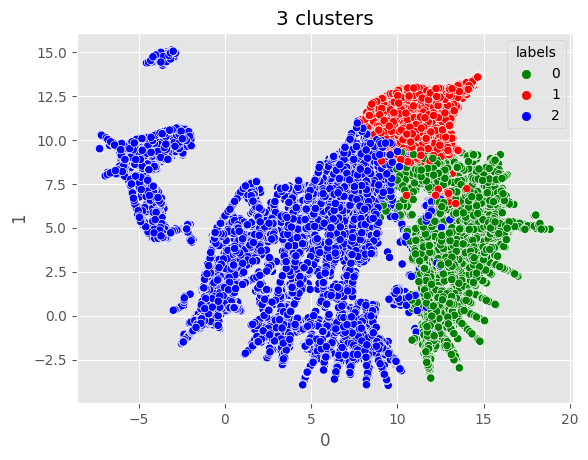

In [29]:
kmeans=KMeans(n_clusters=3, n_init=3)
labels=kmeans.fit_predict(x)
sns.scatterplot(data=pd.DataFrame(comps).assign(labels=labels) ,x=0,y=1,hue='labels',palette=['green','red','blue']).set_title(label='3 clusters')

Text(0.5, 1.0, '4 clusters')

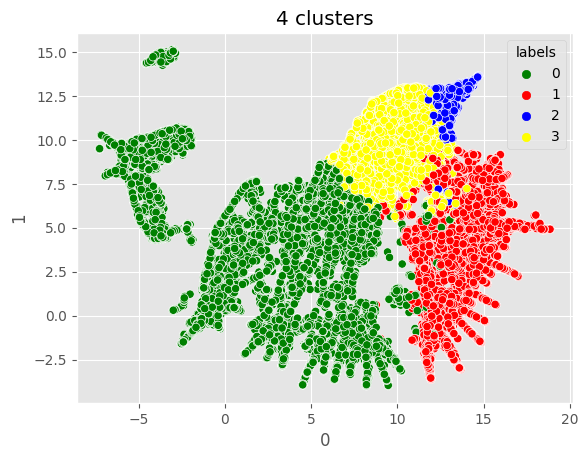

In [30]:
kmeans=KMeans(n_clusters=4, n_init=3)
labels=kmeans.fit_predict(x)
sns.scatterplot(data=pd.DataFrame(comps).assign(labels=labels) ,x=0,y=1,hue='labels',palette=['green','red','blue', 'yellow']).set_title(label='4 clusters')

<Axes: xlabel='0', ylabel='1'>

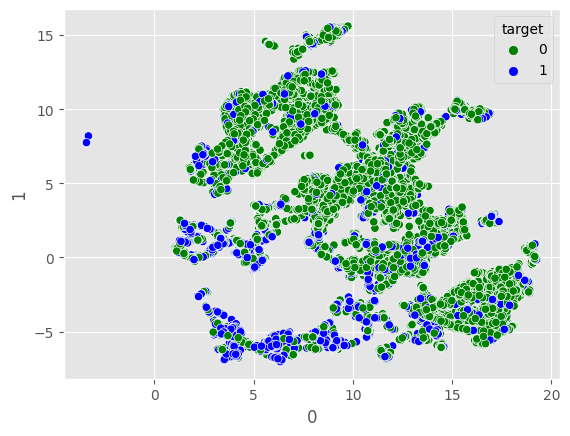

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(x)
umap=UMAP()
comps=umap.fit_transform(xsc)
sns.scatterplot(data=pd.DataFrame(comps).assign(target=y), x=0, y=1, hue='target', palette=['green', 'blue' ])

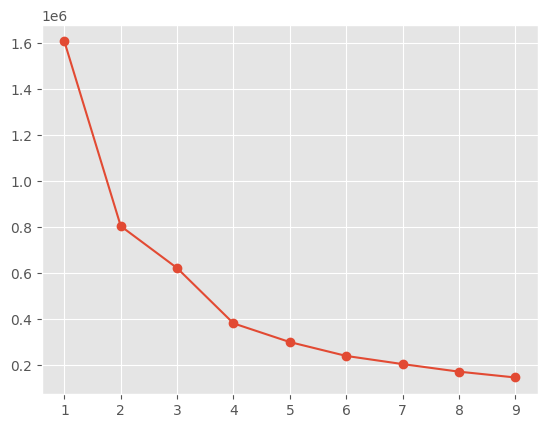

In [32]:
ssr=[]
for k in range(1, 10):
  model=KMeans(n_clusters=k, n_init=3)
  model.fit(comps)
  ssr.append(model.inertia_)

plt.plot(range(1, 10), ssr, '-o')
plt.xticks(range(1, 10))
plt.show()

<ipython-input-44-1b6133340ec0>:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data=pd.DataFrame(comps).assign(labels=labels) ,x=0,y=1,hue='labels',palette=['green','red','blue', 'yellow']).set_title(label='3 clusters')


Text(0.5, 1.0, '3 clusters')

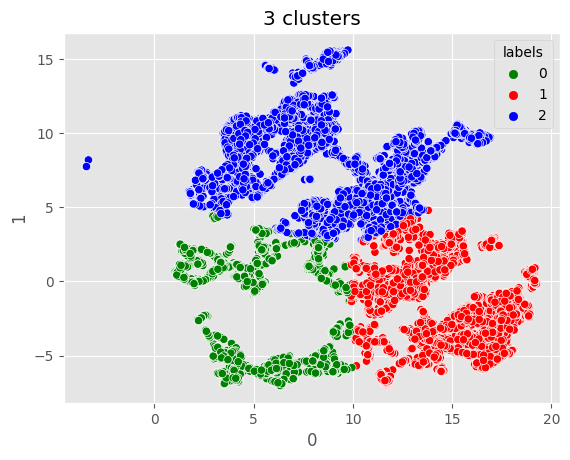

In [44]:
kmeans=KMeans(n_clusters=3, n_init=3)
labels=kmeans.fit_predict(comps)
sns.scatterplot(data=pd.DataFrame(comps).assign(labels=labels) ,x=0,y=1,hue='labels',palette=['green','red','blue', 'yellow']).set_title(label='3 clusters')

In [55]:
df=df.assign(ThreeKlasses=labels)
df.pop('Klass')

0        1
1        3
2        3
3        2
4        0
        ..
29995    0
29996    0
29997    1
29998    2
29999    0
Name: Klass, Length: 30000, dtype: int32

In [56]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,ThreeKlasses
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,0
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,2
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,2
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,2
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,1
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,1
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,0
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,1


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,ThreeKlasses,FourKlasses
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,0,2
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,2,0
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,2,0
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,2,3
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,1,1
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,0,1,1
29997,29998,30000,1,2,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,1,0,2
29998,29999,80000,1,3,1,41,1,-1,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,1,3


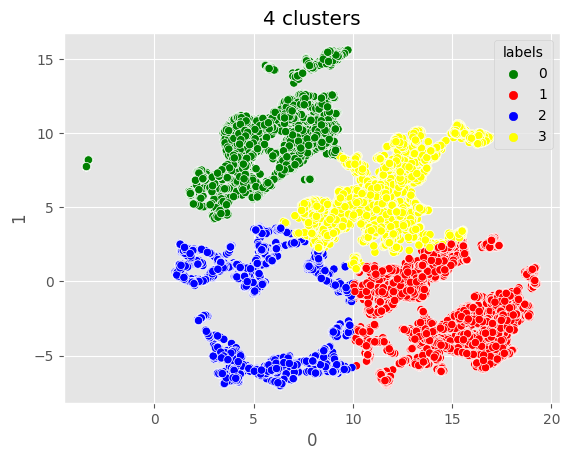

In [57]:
kmeans=KMeans(n_clusters=4, n_init=3)
labels=kmeans.fit_predict(comps)
sns.scatterplot(data=pd.DataFrame(comps).assign(labels=labels) ,x=0,y=1,hue='labels',palette=['green','red','blue', 'yellow']).set_title(label='4 clusters')
df=df.assign(FourKlasses=labels)
df

In [58]:
df.groupby('ThreeKlasses').agg({'LIMIT_BAL':['mean']})

,LIMIT_BAL
,mean
ThreeKlasses,
0,134022.042616
1,168802.825555
2,179252.179979


In [59]:
df.groupby('FourKlasses').agg({'LIMIT_BAL':['mean']})

,LIMIT_BAL
,mean
FourKlasses,
0,163916.752844
1,150928.671204
2,130209.853328
3,214360.516097


<Axes: xlabel='0', ylabel='1'>

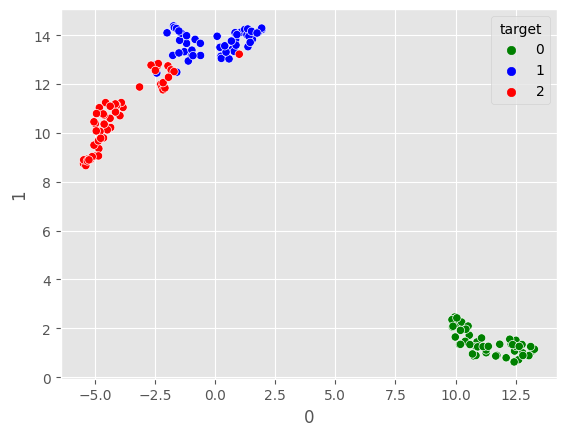

In [61]:
data = load_iris(as_frame=True)['data']
target=load_iris()['target']
umap=UMAP()
comps=umap.fit_transform(data)
sns.scatterplot(data=pd.DataFrame(comps).assign(target=target), x=0, y=1, hue='target', palette=['green', 'blue', 'red'])

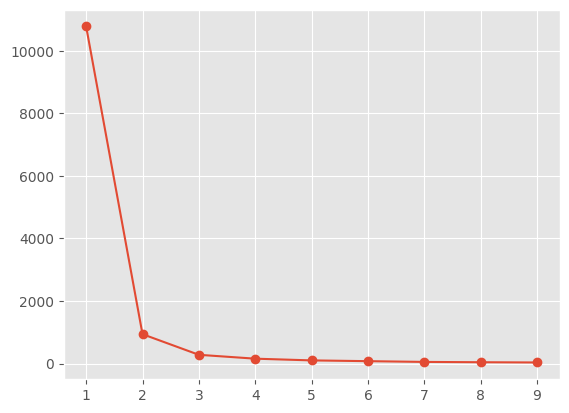

In [62]:
ssr=[]
for k in range(1, 10):
  model=KMeans(n_clusters=k, n_init=3)
  model.fit(comps)
  ssr.append(model.inertia_)

plt.plot(range(1, 10), ssr, '-o')
plt.xticks(range(1, 10))
plt.show()

<ipython-input-63-1b6133340ec0>:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data=pd.DataFrame(comps).assign(labels=labels) ,x=0,y=1,hue='labels',palette=['green','red','blue', 'yellow']).set_title(label='3 clusters')


Text(0.5, 1.0, '3 clusters')

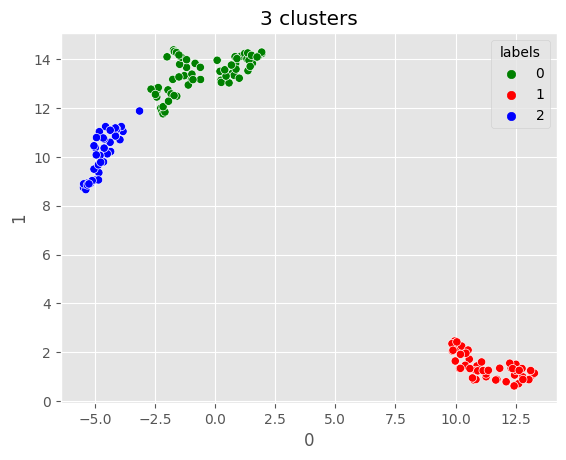

In [63]:
kmeans=KMeans(n_clusters=3, n_init=3)
labels=kmeans.fit_predict(comps)
sns.scatterplot(data=pd.DataFrame(comps).assign(labels=labels) ,x=0,y=1,hue='labels',palette=['green','red','blue', 'yellow']).set_title(label='3 clusters')